In [1]:
import numpy as np
from astroNN.datasets import load_galaxy10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import time
import json

In [ ]:
# Step 1: Obtain the Galaxy10_DECals dataset
images, labels = load_galaxy10()

In [3]:
# Print some basic information about the dataset
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (17736, 256, 256, 3)
Labels shape: (17736,)


In [4]:
# Step 2: Preprocess the data
# Normalize pixel values to range [0, 1]
images = images.astype('float32') / 255.0

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
train_class_counts = Counter(y_train)
test_class_counts = Counter(y_test)

In [7]:
# Convert labels to one-hot encoded format
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
class_names =  ['Disturbed Galaxy', 
                 'Merging Galaxy', 
                 'Round Smooth Galaxy', 
                 'In-between Round Smooth Galaxy', 
                 'Cigar Shaped Smooth Galaxy', 
                 'Barred Spiral Galaxy', 
                 'Unbarred Tight Spiral Galaxy', 
                 'Unbarred Loose Spiral Galaxy', 
                 'Edge-on Galaxy without Bulge', 
                 'Edge-on Galaxy with Bulge']

Class distribution in training set:
Class 7: 2112 samples
Class 3: 1619 samples
Class 1: 1480 samples
Class 8: 1140 samples
Class 2: 2116 samples
Class 6: 1464 samples
Class 9: 1510 samples
Class 5: 1607 samples
Class 0: 877 samples
Class 4: 263 samples

Class distribution in test set:
Class 7: 516 samples
Class 4: 71 samples
Class 2: 529 samples
Class 8: 283 samples
Class 3: 408 samples
Class 6: 365 samples
Class 9: 363 samples
Class 5: 436 samples
Class 0: 204 samples
Class 1: 373 samples


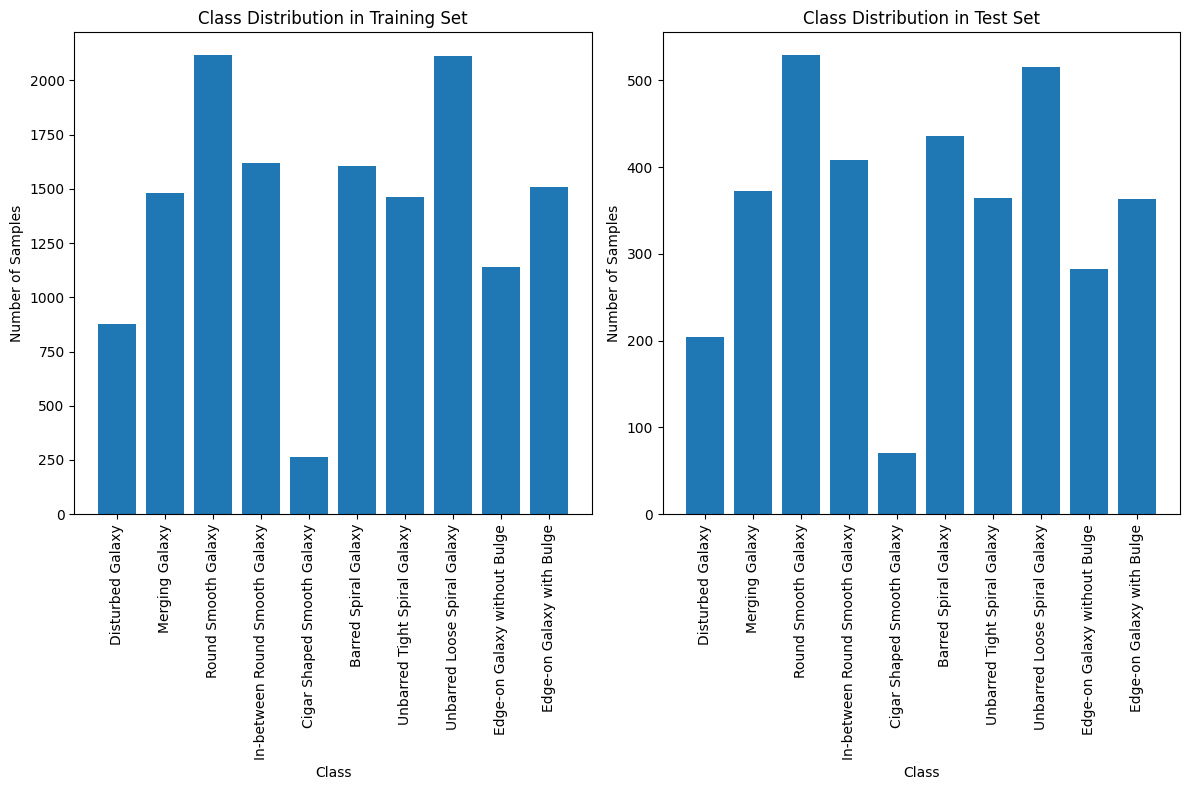

In [9]:
# Print class distribution
print("Class distribution in training set:")
for class_label, count in train_class_counts.items():
    print(f"Class {class_label}: {count} samples")

print("\nClass distribution in test set:")
for class_label, count in test_class_counts.items():
    print(f"Class {class_label}: {count} samples")

# Optional: Visualize class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(range(num_classes), class_names, rotation=90)

plt.subplot(1, 2, 2)
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.title("Class Distribution in Test Set")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(range(num_classes), class_names, rotation=90)

plt.tight_layout()
plt.show()

In [11]:
# Print shapes of the resulting datasets
print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training images shape: (14188, 256, 256, 3)
Training labels shape: (14188, 10)
Testing images shape: (3548, 256, 256, 3)
Testing labels shape: (3548, 10)


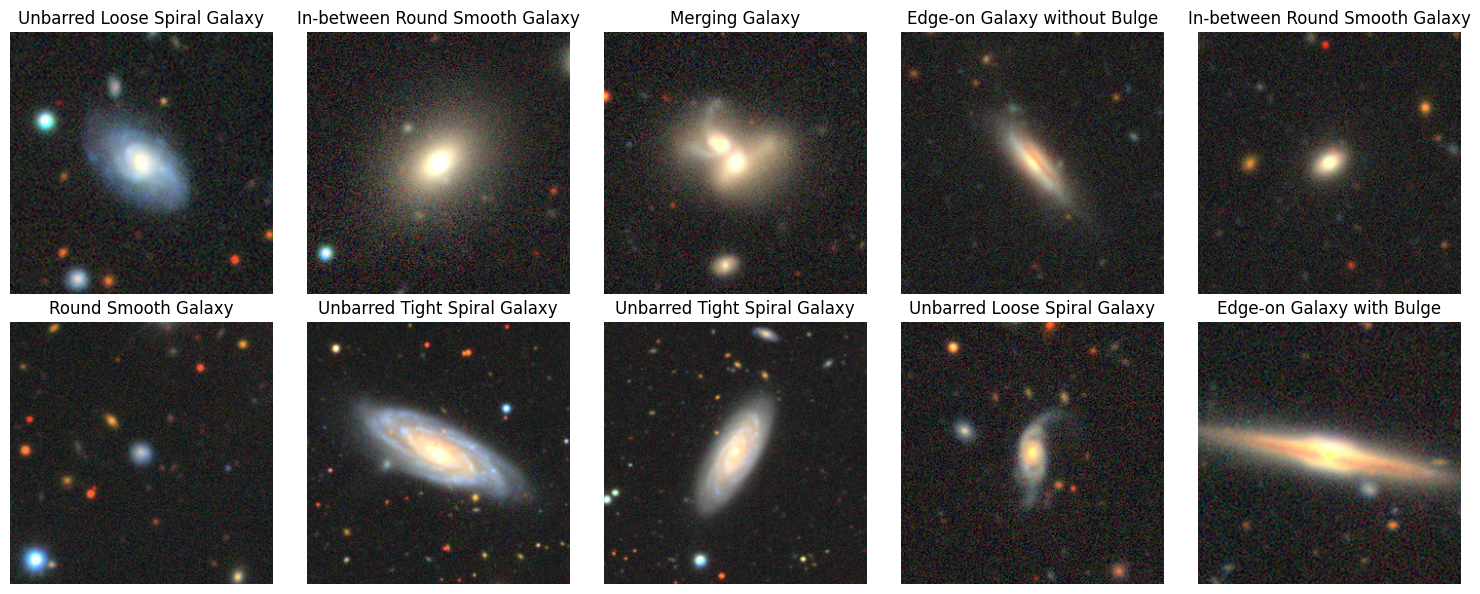

In [12]:
# Optionally, visualize a few images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"{class_names[np.argmax(y_train[i])]}")
    #title(class_names[np.argmax(sample_labels[i])]
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
input_shape=(256, 256, 3)
model1 = models.Sequential([
    # Data Augmentation Layers
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    
    # CNN Layers

    layers.Conv2D(filters=8, kernel_size=10, input_shape=input_shape, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=16, kernel_size=6, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'),
    layers.Conv2D(filters=16, kernel_size=4, padding='same', activation='relu'),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(rate=0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model1.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

In [15]:
# Step 4: Train the Model
#early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
print("Training Start!")
start = time.time()
history = model1.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_split=0.2
                    #callbacks=[early_stopping]
                   )
print("Total time: ", time.time() - start, "seconds")

Training Start!
Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 54s 289ms/step - accuracy: 0.1714 - loss: 2.2077 - val_accuracy: 0.2498 - val_loss: 1.9625
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.2581 - loss: 1.9675 - val_accuracy: 0.2914 - val_loss: 1.8437
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.2957 - loss: 1.8520 - val_accuracy: 0.3707 - val_loss: 1.6923
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.3775 - loss: 1.6601 - val_accuracy: 0.4574 - val_loss: 1.4848
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 236ms/step - accuracy: 0.4212 - loss: 1.5417 - val_accuracy: 0.4651 - val_loss: 1.4311
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - accuracy: 0.4422 - loss: 1.4776 - val_accuracy: 0.4887 - val_loss: 1.4084
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.4762 - loss: 1.4130 - val_accuracy: 0.5113 - val_loss: 1.3564
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 

In [16]:
# Step 5: Evaluate Performance
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6514 - loss: 1.0224
Test accuracy: 0.6567


In [17]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step
                                precision    recall  f1-score   support

              Disturbed Galaxy       0.28      0.04      0.07       204
                Merging Galaxy       0.45      0.87      0.59       373
           Round Smooth Galaxy       0.84      0.86      0.85       529
In-between Round Smooth Galaxy       0.83      0.80      0.82       408
    Cigar Shaped Smooth Galaxy       0.61      0.42      0.50        71
          Barred Spiral Galaxy       0.80      0.49      0.61       436
  Unbarred Tight Spiral Galaxy       0.64      0.55      0.59       365
  Unbarred Loose Spiral Galaxy       0.47      0.58      0.52       516
  Edge-on Galaxy without Bulge       0.80      0.71      0.75       283
     Edge-on Galaxy with Bulge       0.79      0.74      0.77       363

                      accuracy                           0.66      3548
                     macro avg       0.65      0.61      0.61      3548
                  we

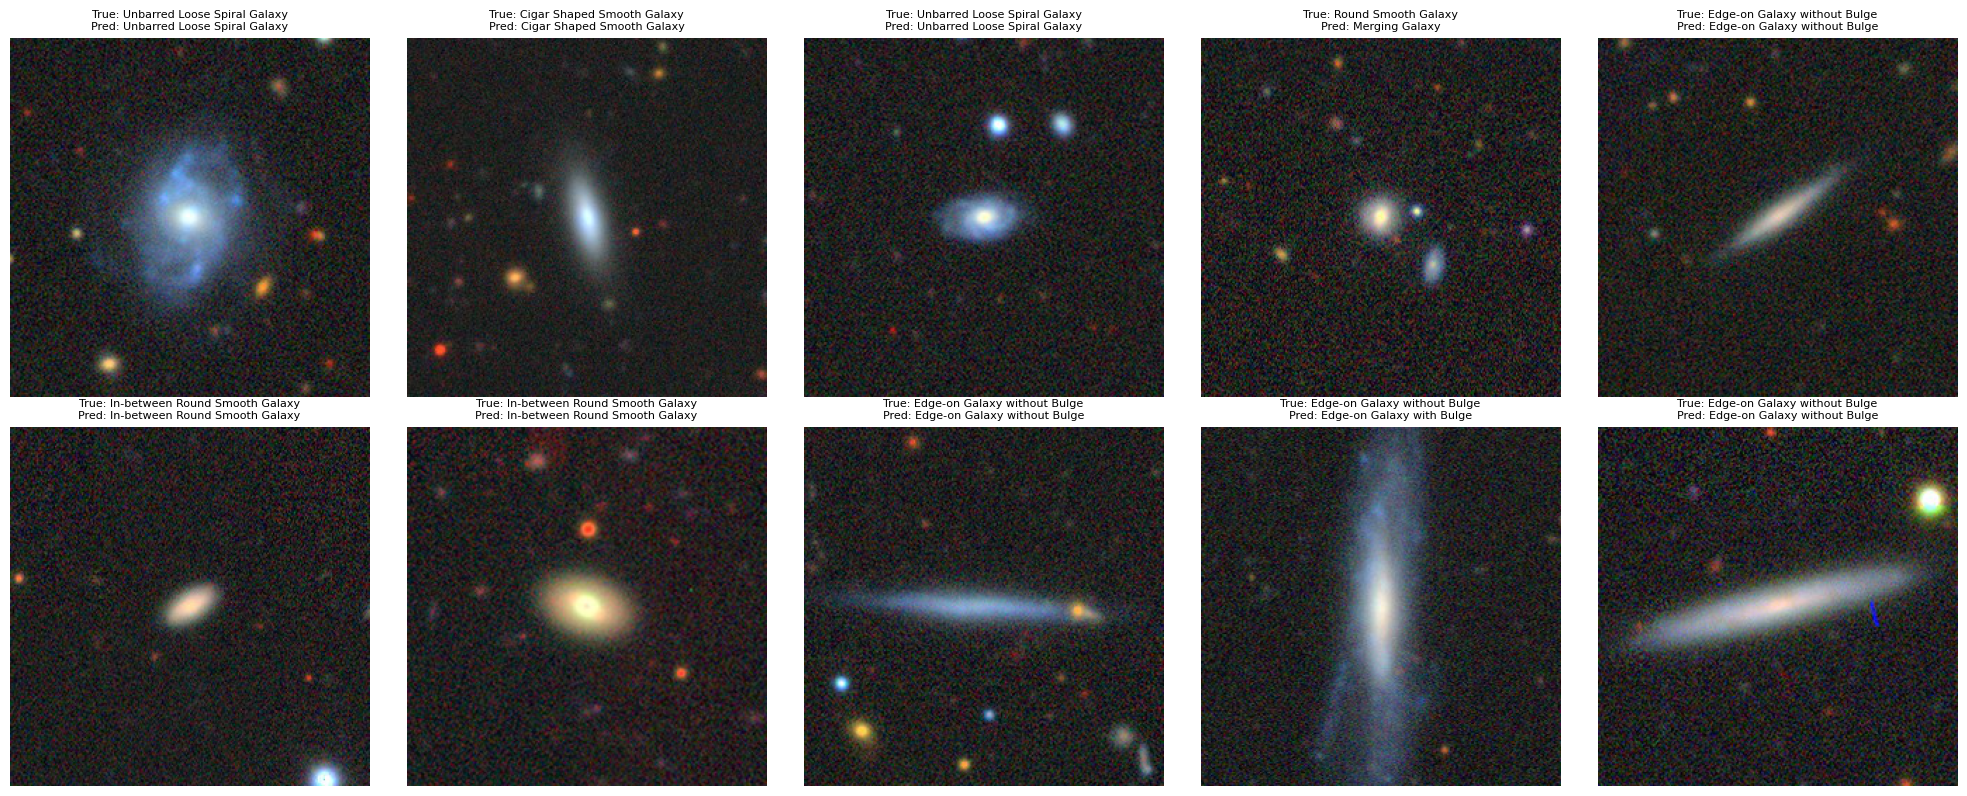

In [18]:
# Make predictions on test set
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Visualize a few images with predictions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    true_label = class_names[y_true_classes[i]]
    pred_label = class_names[y_pred_classes[i]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()

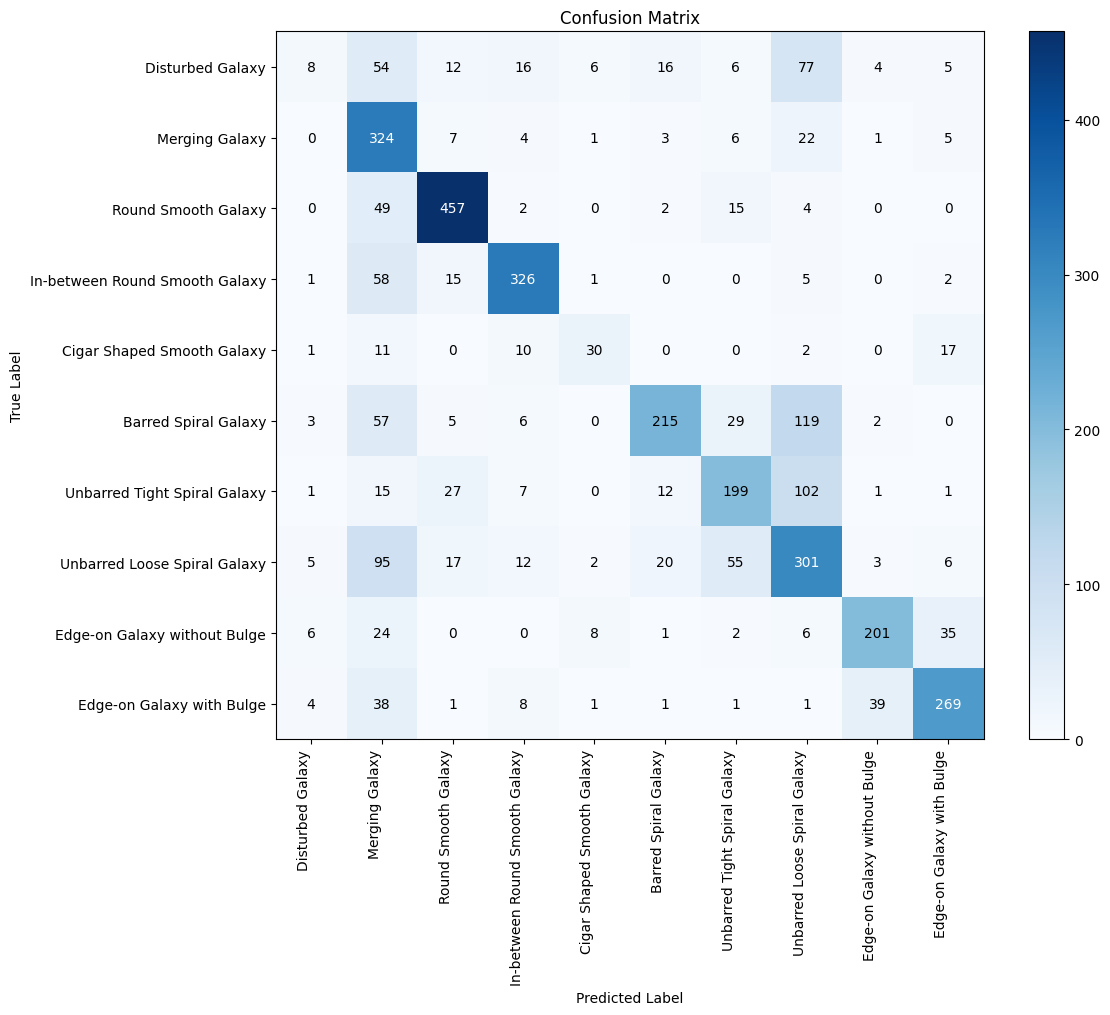

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a figure for the confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=90, ha='right')
ax.set_yticklabels(class_names)

# Add colorbar
plt.colorbar(im)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()